In [1]:
import pandas as pd
import pymongo
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']= 'TRUE'
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["solve"]
collection = db["data"]
data = pd.DataFrame(list(collection.find({
    
})))

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log10

data = list(collection.find())
# data = list(collection.aggregate([ {'$sample': {'size':1000}}]))
param_r = []
param_nt = []
param_kappa10 = []
param_Tre = []
param_DNre = []
for entry in data:
    param_r.append((entry['r']))
    param_nt.append((entry['n_t']))
    param_kappa10.append((entry['kappa10']))
    param_Tre.append((entry['T_re']))
    param_DNre.append((entry['DN_re']))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


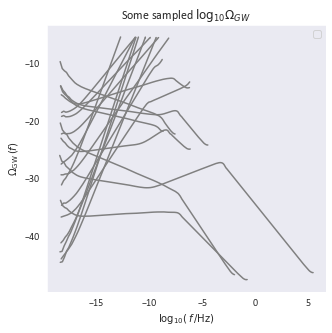

In [6]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Calibri']  
mpl.rcParams['font.size'] = 10  
plt.rcParams['figure.figsize'] = (4.48, 4.48) #2.24, 2.24 设置figure_size尺寸
plt.rcParams['savefig.dpi'] = 50 #图片像素
data = collection.aggregate([ {'$match':{'T_re':{'$lte':1000}}},{'$sample': {'size':20}}])
plt.rcParams['figure.figsize'] = (4.48, 4.48) #2.24, 2.24 设置figure_size尺寸
for entry in data:
    plt.plot(entry['f'],entry['log10OmegaGW'],color='grey')
    # plt.plot(entry['f_interp'],entry['log10OmegaGW_interp'])
plt.title("Some sampled $\log_{10}\Omega_{GW}$")
plt.grid(False)
plt.tight_layout()
plt.xlabel("$\log_{10}(\,f\,/\mathrm{Hz})$")
plt.ylabel("$\Omega_\mathrm{GW}\,(f)$")
# plt.savefig('./image/sample_log10OmegaGW.eps', format='eps', dpi = 50, bbox_inches = 'tight')
    # ax2.set_xlabel('$\log_{10}(\,f\,/\mathrm{Hz})$', fontsize=14)
    # ax2.set_ylabel('$\Omega_\mathrm{GW}\,(f)$', fontsize=14)
plt.legend()
plt.show()

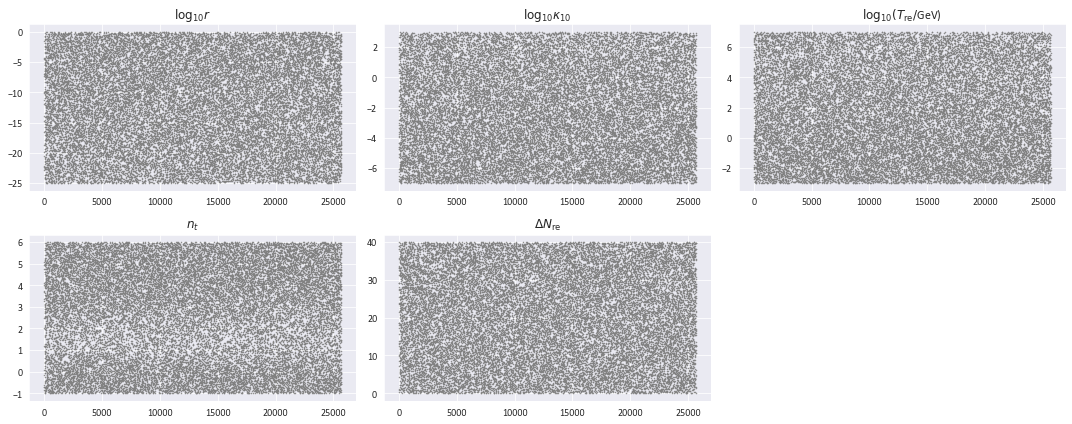

In [28]:
import matplotlib as mpl
# mpl.rcParams['font.weight'] = 'normal' 
mpl.rcParams['font.sans-serif'] = ['Calibri']  
mpl.rcParams['font.size'] = 10  
plt.rcParams['figure.figsize'] = (4.48, 4.48) #2.24, 2.24 设置figure_size尺寸
plt.rcParams['savefig.dpi'] = 50 #图片像素

x = np.linspace(0, 10, 100)

# 创建2行3列的子图布局
fig, axs = plt.subplots(2, 3, figsize=(15, 6))

# 使用前5个子图（展平数组方便访问）
axs_flat = axs.flatten()
axs_flat[0].plot(log10(param_r),'.',color='grey',markersize=1)
axs_flat[0].set_title('$\log_{10}r$')
axs_flat[1].plot(log10(param_kappa10),'.',color='grey',markersize=1)
axs_flat[1].set_title('$\log _{10}\kappa _{10}$')
axs_flat[2].plot(log10(param_Tre),'.',color='grey',markersize=1)
axs_flat[2].set_title('$\log _{10}( T_{{\mathrm{re}}}/$GeV) ')
axs_flat[3].plot(param_nt,'.',color='grey',markersize=1)
axs_flat[3].set_title('$n_t$')
axs_flat[4].plot(param_DNre,'.',color='grey',markersize=1)
axs_flat[4].set_title('$\Delta N_{{\mathrm{re}}}$')
# for i in range(5):
#     axs_flat[i].plot(x, np.cos(x + i))
#     axs_flat[i].set_title(f'Subplot {i+1}')

# 隐藏第6个子图（如果不需要）
axs_flat[5].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.savefig('./image/parameters.eps', format='eps', dpi = 50, bbox_inches = 'tight')
# plt.show()

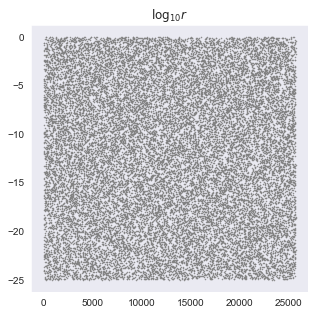

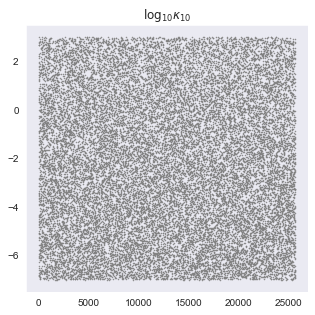

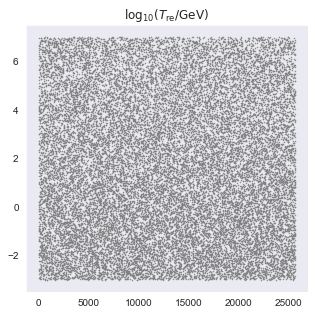

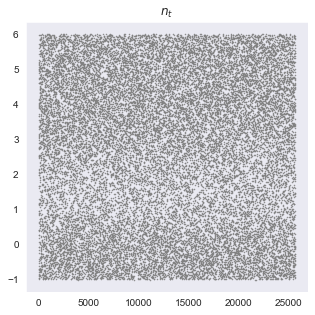

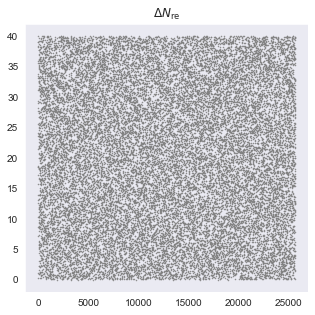

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log10

# 设置全局绘图参数
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 10
plt.rcParams['savefig.dpi'] = 50  # 保存图片像素

# 假设这些参数已经定义（如果没有，请确保定义这些数组）
# param_r, param_kappa10, param_Tre, param_nt, param_DNre = ...

# 定义一个函数来绘制和保存单张图
def plot_and_save(data, title, filename):
    fig = plt.figure(figsize=(4.48, 4.48))  # 单独设置每张图的尺寸
    plt.plot(data, '.', color='grey', markersize=1)
    plt.title(title)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(f'./image/{filename}.eps', format='eps', dpi=50, bbox_inches='tight')
    # plt.close(fig)  # 关闭当前图形，避免占用内存

# 为每个参数单独绘图并保存
plot_and_save(log10(param_r), '$\log_{10}r$', 'param_r')
plot_and_save(log10(param_kappa10), '$\log_{10}\kappa_{10}$', 'param_kappa10')
plot_and_save(log10(param_Tre), '$\log_{10}(T_{\mathrm{re}}/\mathrm{GeV})$', 'param_Tre')
plot_and_save(param_nt, '$n_t$', 'param_nt')
plot_and_save(param_DNre, '$\Delta N_{\mathrm{re}}$', 'param_DNre')

# 如果需要显示而不是保存，可以取消注释
# plt.show()

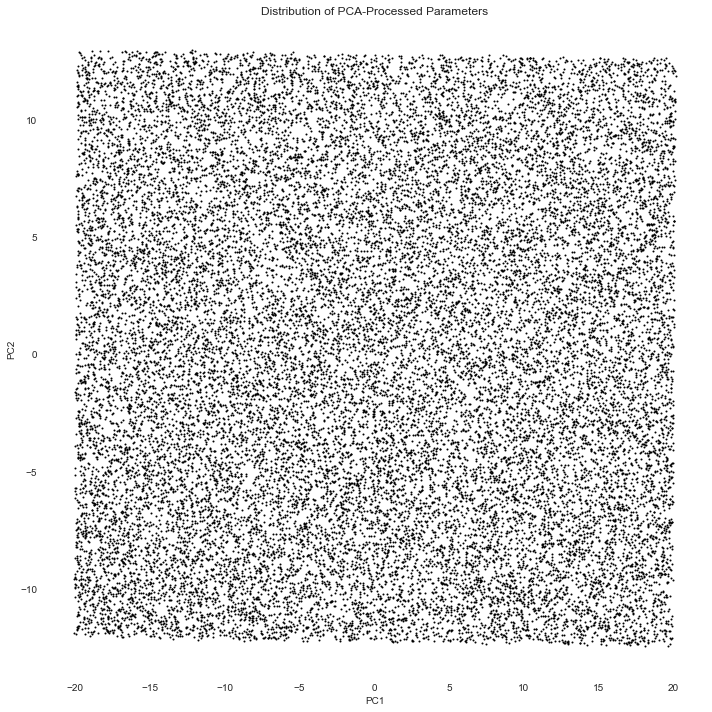

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# 假设数据
data = np.vstack([np.log10(param_r), np.log10(param_kappa10), np.log10(param_Tre), 
                  param_nt, param_DNre]).T

# 设置绘图参数
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 10
plt.rcParams['savefig.dpi'] = 50
plt.rcParams['axes.facecolor'] = 'none'
# PCA 降维到 2D
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# 绘制
plt.figure(figsize=(10, 10))
plt.scatter(data_2d[:, 0], data_2d[:, 1], s=1, color='black')
plt.title('Distribution of PCA-Processed Parameters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(False)
plt.tight_layout()
# plt.savefig('./image/pca_scatter.eps', format='eps', dpi=50, bbox_inches='tight')
plt.show()

In [79]:
data = list(collection.find({'log10OmegaGW':{"$exists":True}}))
starts = []
ends = []
lessPTA = []
moreLIGO = []
for entry in data:
    starts.append(entry['f'][0])
    ends.append(entry['f'][-1])
    if entry['f'][0] < np.log10(1/31557600.0):
        lessPTA.append(starts)
    if entry['f'][0] > np.log10(1726):
        moreLIGO.append(starts)
mpl.rcParams['font.sans-serif'] = ['Calibri']  
mpl.rcParams['font.size'] = 10  
plt.rcParams['figure.figsize'] = (5.6, 5.6) #2.24, 2.24 设置figure_size尺寸
plt.rcParams['savefig.dpi'] = 50 #图片像素

In [80]:
len(lessPTA)/len(data)

0.6074195180816692

In [82]:
len(moreLIGO)/len(data)

0.1155747596247421

In [77]:
np.log10(1/31557600.0)

-7.499103967085228

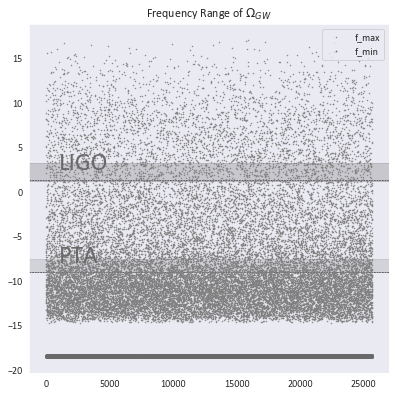

In [76]:

# plt.plot(starts,'.',label='f_max',color='grey',markersize=1)
# plt.plot(ends,'.',label='f_min',color='dimgrey',markersize=1.5)
plt.axhspan(np.log10(20), np.log10(1726), alpha=0.15, color='black')
plt.axhline(np.log10(25), ls='--', c='k', lw=.5)
plt.text(np.log10(25)+1000,2.5, 'LIGO',  fontsize=25,color='dimgrey')
plt.axhline(-9, ls='--', c='k', lw=.5)
plt.text(np.log10(25)+1000,np.log10(1/31557600.0)-0.5, 'PTA', fontsize=25,color='dimgrey')
plt.axhspan(-9, np.log10(1/31557600.0), alpha=0.1, color='black')
plt.plot(starts,'.',label='f_max',color='grey',markersize=1)
plt.plot(ends,'.',label='f_min',color='dimgrey',markersize=1.5)
# plt.axvspan(-9, np.log10(1/yr), alpha=0.1, color='black')
plt.title("Frequency Range of $\Omega_{GW}$")
plt.grid(False)
plt.tight_layout()
plt.savefig('./image/frequency_range.pdf', format='pdf', dpi = 50, bbox_inches = 'tight')
plt.legend()

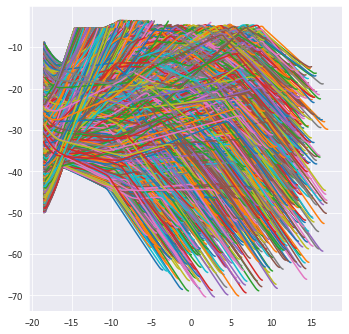

In [83]:
# data = list(collection.find({'log10OmegaGW':{"$exists":True, "$size": 150}}))
for entry in data:
    plt.plot(entry['f'],entry['log10OmegaGW'])

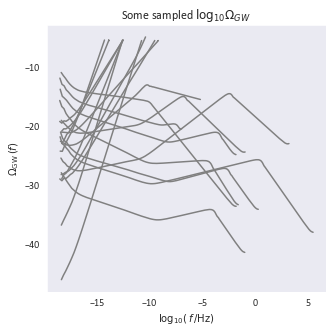

In [97]:
data = collection.aggregate([ {'$match':{'T_re':{'$lte':1000}}},{'$sample': {'size':20}}])
plt.rcParams['figure.figsize'] = (4.48, 4.48) #2.24, 2.24 设置figure_size尺寸
for entry in data:
    plt.plot(entry['f'],entry['log10OmegaGW'],color='grey')
    # plt.plot(entry['f_interp'],entry['log10OmegaGW_interp'])
plt.title("Some sampled $\log_{10}\Omega_{GW}$")
plt.grid(False)
plt.tight_layout()
plt.xlabel("$\log_{10}(\,f\,/\mathrm{Hz})$")
plt.ylabel("$\Omega_\mathrm{GW}\,(f)$")
plt.savefig('./image/sample_log10OmegaGW.eps', format='eps', dpi = 50, bbox_inches = 'tight')
    # ax2.set_xlabel('$\log_{10}(\,f\,/\mathrm{Hz})$', fontsize=14)
    # ax2.set_ylabel('$\Omega_\mathrm{GW}\,(f)$', fontsize=14)
# plt.legend()

In [99]:
data = list(collection.find({'log10OmegaGW':{"$exists":True}}))
lengths = []
for entry in data:
    lengths.append(len(entry['f']))

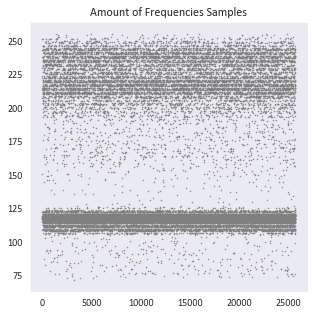

In [102]:
plt.plot(lengths,'.',color = "grey",markersize = 1)
plt.title("Amount of Frequencies Samples")
plt.grid(False)
plt.tight_layout()
# plt.xlabel("$\log_{10}(\,f\,/\mathrm{Hz})$")
# plt.ylabel("$\Omega_\mathrm{GW}\,(f)$")
plt.savefig('./image/f_sample_amount.eps', format='eps', dpi = 50, bbox_inches = 'tight')

In [ ]:
len(data)

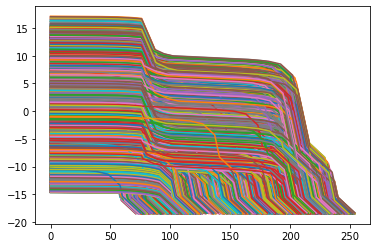

In [4]:
data = list(collection.find({'log10OmegaGW':{"$exists":True}}))

for entry in data:
    plt.plot(entry['f'])


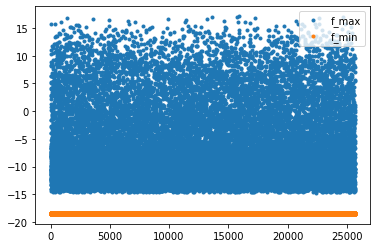

In [6]:
data = list(collection.find({'log10OmegaGW':{"$exists":True}}))
starts = []
ends = []
for entry in data:
    starts.append(entry['f'][0])
    ends.append(entry['f'][-1])
plt.plot(starts,'.',label='f_max')
plt.plot(ends,'.',label='f_min')
plt.legend()

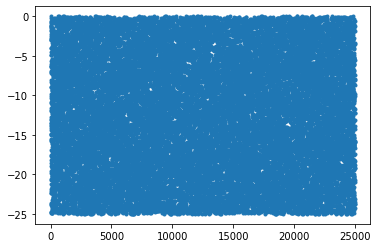

In [11]:
from numpy import log10
data = list(collection.find({'log10OmegaGW':{"$exists":True}}))
lengths = []
for entry in data:
    lengths.append(log10(entry['r']))
plt.plot(lengths,'.')

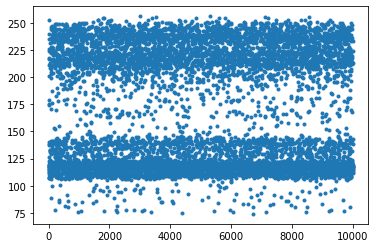

In [11]:
lengths = []
for entry in data:
    lengths.append(len(entry['f']))
plt.plot(lengths,'.')

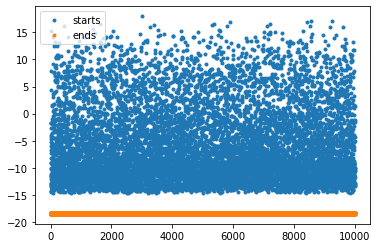

In [112]:
data = list(collection.find({'log10OmegaGW':{"$exists":True}}))
starts = []
ends = []
for entry in data:
    starts.append(entry['f'][0])
    ends.append(entry['f'][-1])
plt.plot(starts,'.',label='starts')
plt.plot(ends,'.',label='ends')
plt.legend()

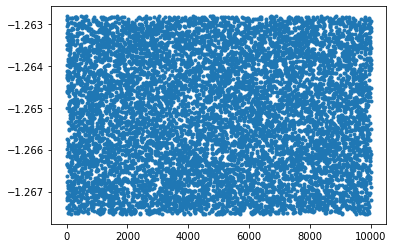

In [53]:
ends = []
for entry in data:
    ends.append(-log10(-entry['f'][-1]))
plt.plot(ends,'.')

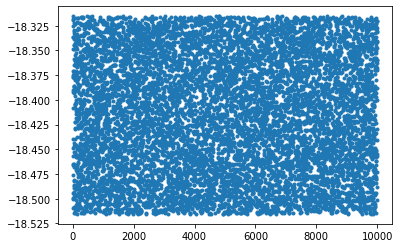

In [54]:
ends = []
for entry in data:
    ends.append(entry['f'][-1])
plt.plot(ends,'.')

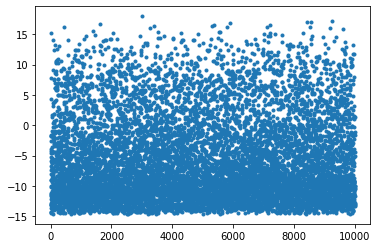

In [55]:
starts = []
for entry in data:
    starts.append(entry['f'][0])
plt.plot(starts,'.')

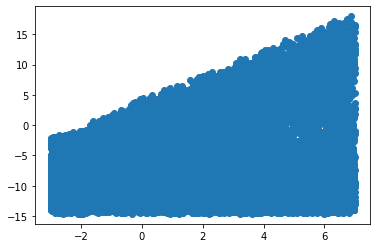

In [19]:
data = list(collection.find({'log10OmegaGW': {"$exists": True}}))
starts = []
var = []
for entry in data:
    starts.append(entry['f'][0])
    var.append(log10(entry['T_re']))
plt.scatter(var,starts)

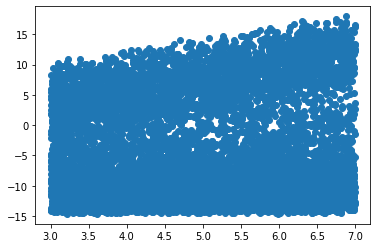

In [21]:
data = list(collection.find({'T_re':{'$gte':1000}}))
starts = []
var = []
for entry in data:
    starts.append(entry['f'][0])
    var.append(log10(entry['T_re']))
plt.scatter(var,starts)

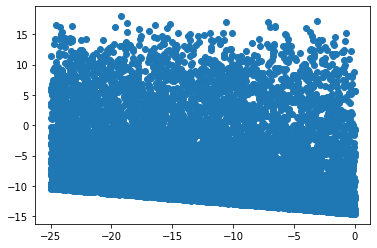

In [122]:
starts = []
var = []
for entry in data:
    starts.append(entry['f'][0])
    var.append(log10(entry['r']))
plt.scatter(var,starts)

(array([2367., 2644., 1470., 1128.,  782.,  572.,  530.,  324.,  150.,
          33.]),
 array([-14.62451083, -11.3635801 ,  -8.10264937,  -4.84171864,
         -1.58078792,   1.68014281,   4.94107354,   8.20200427,
         11.462935  ,  14.72386572,  17.98479645]),
 <BarContainer object of 10 artists>)

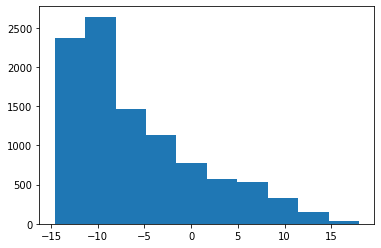

In [63]:
starts = []
for entry in data:
    starts.append(entry['f'][0])
plt.hist(starts)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


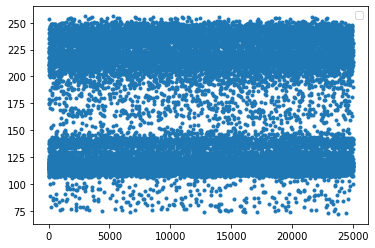

In [26]:
collection = db["data"]
data = list(collection.find({'log10OmegaGW':{"$exists":True}}))
lengths = []
for entry in data:
    lengths.append(len(entry['f']))
plt.plot(lengths,'.')
plt.legend()

In [27]:
max(lengths)

256